# Compute $\hat{R}$ for $k$-commutativity with various molecules

## Setup

In [2]:
import os

import matplotlib.pyplot as plt; plt.rcParams.update({"font.family": "serif", "font.size": 12})
import numpy as np

import cirq
import openfermion

from kcommute import get_si_sets, r_hat_measurement_count
from kcommute.commute import compute_blocks
from kcommute.hamlib_interface import read_openfermion_hdf5

### Set parameters

In [ ]:
data_directory: str = "../data/input/hamlib-molecules/"
extension: str = ".hdf5"
fnames_encodings = {
    "O2": "/ham_JW16",
    "B2": "/ham_JW-10",
    "BeH": "/ham_JW10",
    "BH": "/ham_JW-10",
    "CH": "/ham_JW-10",
    "HF": "/ham_JW10",
    "C2": "/ham_JW-10",
    "OH": "/ham_JW10",
    "N2": "/ham_JW-14",
    "Li2": "/ham_JW10",
    "NaLi": "/ham_JW-14",
}

In [4]:
fnames = list(fnames_encodings.keys())
fermion_to_qubit_mapping_key: int = 0

## Run script

In [5]:
all_groups = {}
all_rhats = {}

for fname, encoding in fnames_encodings.items():
    print("On molecule", fname)
    hamiltonian = read_openfermion_hdf5(
        os.path.join(data_directory, fname + extension),
        encoding,
    )

    nq = openfermion.utils.count_qubits(hamiltonian)
    qubits = cirq.LineQubit.range(nq)

    k_values = [1, nq // 4, nq // 2, 3 * nq // 4, nq]
    groups = []
    rhats = []

    for k in k_values:
        print("Status: k =", k)
        groups.append(get_si_sets(hamiltonian, compute_blocks(qubits, k)))
        rhats.append(r_hat_measurement_count(groups[-1]))

        print("# groups =", len(groups[-1]))
        print("rhat =", rhats[-1])
    
    all_groups[fname] = groups
    all_rhats[fname] = rhats

On molecule O2
Status: k = 1
# groups = 471
rhat = 14.139492491861064
Status: k = 4
# groups = 220
rhat = 19.619874936040734
Status: k = 8
# groups = 135
rhat = 26.99135220092941
Status: k = 12
# groups = 121
rhat = 27.386910469759943
Status: k = 16
# groups = 30
rhat = 41.86811115542467
On molecule B2
Status: k = 1
# groups = 33
rhat = 21.179719451052986
Status: k = 2
# groups = 17
rhat = 22.199393545823394
Status: k = 5
# groups = 21
rhat = 22.154454627784062
Status: k = 7
# groups = 19
rhat = 24.268596076372205
Status: k = 10
# groups = 11
rhat = 26.972770306144643
On molecule BeH
Status: k = 1
# groups = 79
rhat = 18.5464837027758
Status: k = 2
# groups = 36
rhat = 23.8324431788903
Status: k = 5
# groups = 41
rhat = 22.962556338749966
Status: k = 7
# groups = 38
rhat = 23.372423928492687
Status: k = 10
# groups = 21
rhat = 29.127360612890037
On molecule BH
Status: k = 1
# groups = 79
rhat = 19.21825263553525
Status: k = 2
# groups = 40
rhat = 25.30942294527872
Status: k = 5
# group

In [ ]:
# Load N2 Rhat results from arXiv 2405.05068. Note these values are calculated in the n2.ipynb script.
rhats_n2_ibm = 
rhats_n2_ibm

array([ 20.85432256,  25.26560464,  53.6771832 ,  63.10359816,
       111.98245478])

## Plot results

In [19]:
all_ngroups = {fname: [len(group) for group in groups] for fname, groups in all_groups.items()}
all_ngroups["N2i"] = list([int(n) for n in np.loadtxt("all_ngroups_n2_ibm.txt")])
all_ngroups

{'O2': [471, 220, 135, 121, 30],
 'B2': [33, 17, 21, 19, 11],
 'BeH': [79, 36, 41, 38, 21],
 'BH': [79, 40, 42, 43, 21],
 'CH': [79, 39, 39, 39, 21],
 'HF': [75, 41, 35, 36, 19],
 'C2': [37, 18, 17, 23, 11],
 'OH': [78, 38, 37, 35, 20],
 'N2': [234, 173, 64, 93, 28],
 'Li2': [37, 15, 21, 22, 11],
 'NaLi': [379, 228, 149, 138, 61],
 'N2i': [1051, 820, 200, 183, 54]}

In [20]:
ngroups_to_plot = np.array(list(all_ngroups.values()))
ngroups_to_plot

array([[ 471,  220,  135,  121,   30],
       [  33,   17,   21,   19,   11],
       [  79,   36,   41,   38,   21],
       [  79,   40,   42,   43,   21],
       [  79,   39,   39,   39,   21],
       [  75,   41,   35,   36,   19],
       [  37,   18,   17,   23,   11],
       [  78,   38,   37,   35,   20],
       [ 234,  173,   64,   93,   28],
       [  37,   15,   21,   22,   11],
       [ 379,  228,  149,  138,   61],
       [1051,  820,  200,  183,   54]])

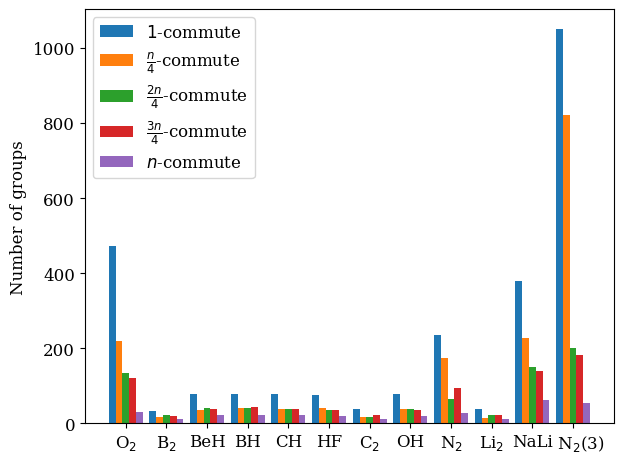

In [ ]:
xs = np.arange(len(ngroups_to_plot))
width = 2.0 / len(xs)

for i, ngroups in enumerate(ngroups_to_plot.T):
    plt.bar(xs + (i - len(ngroups_to_plot.T) // 2) * width, ngroups, width=width, align="center")

labels = ["O$_2$", "B$_2$", "BeH", "BH", "CH", "HF", "C$_2$", "OH", "N$_2$", "Li$_2$", "NaLi", "   N$_2$(3)"]
plt.xticks(xs, labels=labels)
plt.ylabel("Number of groups")
plt.legend(["$1$-commute", r"$\frac{n}{4}$-commute", r"$\frac{2n}{4}$-commute", r"$\frac{3n}{4}$-commute", "$n$-commute"])
plt.tight_layout();
# plt.savefig("molecules_ngroups.pdf")

In [22]:
all_rhats["N2i"] = np.loadtxt("all_rhats_n2_ibm.txt")

In [23]:
rhats_to_plot = np.array(list(all_rhats.values()))
rhats_to_plot

array([[ 14.13949249,  19.61987494,  26.9913522 ,  27.38691047,
         41.86811116],
       [ 21.17971945,  22.19939355,  22.15445463,  24.26859608,
         26.97277031],
       [ 18.5464837 ,  23.83244318,  22.96255634,  23.37242393,
         29.12736061],
       [ 19.21825264,  25.30942295,  23.73642363,  23.74202272,
         31.60728232],
       [ 20.19957073,  24.1454675 ,  23.73150674,  23.55061758,
         30.16100115],
       [ 13.17777199,  13.72623553,  14.11375308,  14.23841596,
         17.12717128],
       [ 16.06582787,  16.66981973,  16.970388  ,  16.54932838,
         19.64127952],
       [ 14.64923339,  16.03767218,  15.96611692,  16.40052239,
         20.09242672],
       [ 16.49558513,  20.02218115,  29.75520217,  24.67793435,
         34.14026241],
       [ 21.12245926,  23.69374465,  22.82179672,  22.79803984,
         26.40008944],
       [ 16.708745  ,  17.07490112,  17.27828504,  17.76607548,
         19.73131863],
       [ 20.85432256,  25.26560464,  53.677

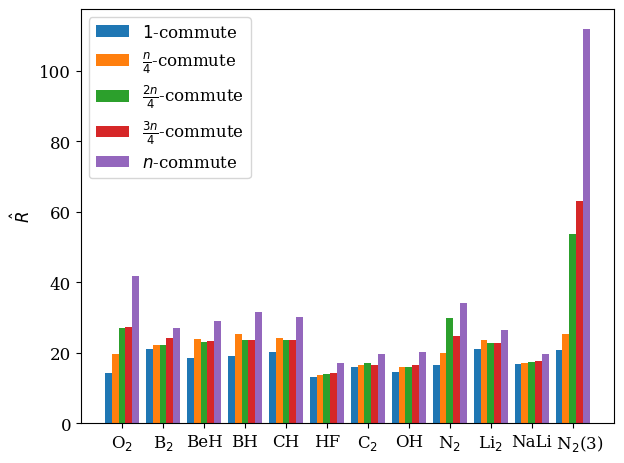

In [34]:
xs = np.arange(len(rhats_to_plot))
width = 2.0 / len(xs)

for i, rhats in enumerate(rhats_to_plot.T):
    plt.bar(xs + (i - len(rhats_to_plot.T) // 2) * width, rhats, width=width, align="center")

plt.xticks(xs, labels=labels)
plt.ylabel(r"$\hat{R}$")
plt.legend(["$1$-commute", r"$\frac{n}{4}$-commute", r"$\frac{2n}{4}$-commute", r"$\frac{3n}{4}$-commute", "$n$-commute"])
plt.tight_layout();
# plt.savefig("molecules_rhats.pdf")